In [782]:
import pandas as pd
pd.set_option('display.max_columns', None)
data_df = pd.read_csv("messy_data.csv", sep=",")

In [783]:
from scipy import stats
import numpy as np

In [823]:
data_df.head(200)

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
0,0.50,IF,D,IDEAL,5.1,5.15,3.200,61.5,48,3000
1,0.70,VVS2,E,PREMIUM,5.7,5.85,3.520,62.0,59,4500
3,1.20,IF,D,IDEAL,5.9,6.82,4.200,61.7,58,10000
4,0.90,I1,J,FAIR,6.0,5.85,3.700,61.7,48,2400
6,0.50,IF,D,IDEAL,5.1,5.85,3.200,61.5,57,3100
...,...,...,...,...,...,...,...,...,...,...
181,0.35,SI1,I,PREMIUM,4.5,4.49,3.715,62.3,56,2100
186,0.50,SI2,E,PREMIUM,5.1,5.11,3.715,62.5,55,2900
191,1.15,VVS1,G,PREMIUM,6.8,6.85,4.230,62.7,48,9800
192,0.40,SI2,H,FAIR,4.7,5.85,2.910,62.1,58,2000


In [789]:
data_df.dtypes

carat         float64
clarity        object
color          object
cut            object
xdimension    float64
ydimension    float64
zdimension    float64
depth         float64
table         float64
price         float64
dtype: object

In [785]:
# Usuwanie białych znaków
data_df.columns = data_df.columns.str.strip()
data_df.columns = data_df.columns.str.replace(' ', '')

trzeba zająć się x,y,z,depth -> zmienić datatype na float
table, price -> zmienić datatype na int
clarity, color, cut -> ALLCAPS oraz usunąć whitespace
carat -> nan na 0

In [788]:
# Konwersja kolumn liczbowych
numeric_columns = ['xdimension', 'ydimension', 'zdimension', 'depth', 'table', 'price']
data_df[numeric_columns] = data_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [793]:
#konwersja table i price na int

data_df['table'] = data_df['table'].fillna(0).astype(np.int64)
data_df['price'] = data_df['price'].fillna(0).astype(np.int64)

In [795]:
#standaryzacja stringów
data_df['clarity'] = data_df['clarity'].str.upper()
data_df['color'] = data_df['color'].str.upper()
data_df['cut'] = data_df['cut'].str.upper()
data_df['clarity'] = data_df['clarity'].str.strip()
data_df['color'] = data_df['color'].str.strip()
data_df['cut'] = data_df['cut'].str.strip()

duplikaty:

In [797]:
duplicates = data_df.duplicated(subset=[ "price", "cut", "color", "clarity", "carat"], keep=False)

data_df[duplicates]

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
40,0.45,SI2,H,IDEAL,4.8,4.82,3.01,62.1,56,1500
99,0.45,SI2,H,IDEAL,4.8,4.79,2.97,NaN,56,1500


po sprawdzeniu duplikatów postanowilam je zostawić, poniewa oba te diamenty są bardzo podobne, ale nie identyczne,
teraz zajmiemy się brakującymi wartościami

sprawdzamy wartosci NAN i 0

In [805]:
x = (data_df['xdimension'].isna()).sum()
y = (data_df['ydimension'].isna()).sum()
z = (data_df['zdimension'].isna()).sum()
carat = (data_df['carat'].isna()).sum()
price = (data_df['price'] == 0.00).sum()
depth = (data_df['depth'].isna()).sum()
table = (data_df['table'] == 0.00).sum()
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('carat: ', carat)
print('price: ', price)
print('depth: ', depth)
print('table: ', table)

x:  3
y:  64
z:  48
carat:  50
price:  4
depth:  67
table:  33


jest duzo wartosci zerowych/NaN
diamenty, których cena jest równa 0 zdecydowałam się usunąć
x,y,z, table uzupelnie wartoscia mediany
depth mozna wyliczyć ze wzoru: 2*z/(x+y) (u nas jeszcze razy 100, dane sa z ina jednostka)
carat usuwamy puste


In [806]:
# Uśrednianie brakujących wartośći dla x-y-z dimension
numeric_columns = ['xdimension', 'ydimension', 'zdimension']
data_df[numeric_columns] = data_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
data_df[numeric_columns] = data_df[numeric_columns].fillna(data_df[numeric_columns].median())

In [808]:
data_df = data_df.drop(data_df[data_df["price"]==0].index)

In [809]:
# data_df.loc[data_df['xdimension'] == 0, 'xdimension'] = round(data_df['xdimension'].mean(), 2)
# data_df.loc[data_df['ydimension'] == 0, 'ydimension'] = round(data_df['ydimension'].mean(), 2)
# data_df.loc[data_df['zdimension'] == 0, 'zdimension'] = round(data_df['zdimension'].mean(), 2)
data_df.loc[data_df['table'] == 0, 'table'] = round(data_df['table'].mean())
# data_df.loc[data_df['depth'] == 0, 'depth'] = round(data_df['depth'].mean(), 2)

In [812]:
# Usunięcie wierszy, gdzie brakuje kluczowych wartości
data_df.dropna(subset=['price', 'carat', 'depth', 'table'], inplace=True)

In [734]:
# data_df.loc[data_df['depth'] == NaN, 'depth'] = round(200 * data_df['zdimension']/(data_df['xdimension'] + data_df['ydimension']), 2)
data_df['depth'] = data_df['depth'].fillna(round(200 * data_df['zdimension']/(data_df['xdimension'] + data_df['ydimension']), 2))

In [736]:
# Usunięcie wierszy, gdzie brakuje kluczowych wartości
# data_df = data_df.drop(data_df[data_df["carat"]==0].index)
# Usunięcie wierszy, gdzie brakuje kluczowych wartości
data_df.dropna(subset=['price', 'carat', 'depth', 'table'], inplace=True)

skala wartości, którą się kierowałam:
carat: Weight(0.2 to 5.01) 
cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color: Diamond colour from J(worst) to D(best)
clarity: Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x: Length(0 to 10.74) in mm
y: Width(0 to 58.9) in mm
z: Depth(0 to 31.8) in mm
depth %: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter. Total depth percentage(43 to 79) 
table: Width(43 to 95) of the top of diamond relative to widest point

In [814]:
a = data_df['clarity'].unique()
b = data_df['cut'].unique()
c = data_df['color'].unique()
d = data_df['clarity'].unique()
print('clarity ', a)
print('cut ', b)
print('color ', c)
print('clarity ', d)

clarity  ['IF' 'VVS2' 'I1' 'SI2' 'SI1' 'VVS1']
cut  ['IDEAL' 'PREMIUM' 'FAIR' 'VERY GOOD' 'GOOD']
color  ['D' 'E' 'J' 'G' 'H' 'COLORLESS' 'F' 'I']
clarity  ['IF' 'VVS2' 'I1' 'SI2' 'SI1' 'VVS1']


colorless w skali są od D do F, więc weźmiemy wartość środkową czyli e


In [815]:
data_df['color'].replace('COLORLESS', 'E', inplace=True)

In [816]:
mask = ~data_df['xdimension'].between(0, 10.74)

outside_range_data_df = data_df[mask]

print(outside_range_data_df)

Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price]
Index: []


In [817]:
mask = ~data_df['ydimension'].between(0, 58.9)

outside_range_data_df = data_df[mask]

print(outside_range_data_df)

Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price]
Index: []


In [818]:
mask = ~data_df['zdimension'].between(0, 31.8)

outside_range_data_df = data_df[mask]

print(outside_range_data_df)

Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price]
Index: []


In [819]:
mask = ~data_df['depth'].between(43, 79)

outside_range_data_df = data_df[mask]

print(outside_range_data_df)

Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price]
Index: []


In [820]:
mask = ~data_df['table'].between(43, 95)

outside_range_data_df = data_df[mask]

print(outside_range_data_df)

Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price]
Index: []


In [821]:
mask = ~data_df['carat'].between(0.2, 5.01)

outside_range_data_df = data_df[mask]

print(outside_range_data_df)

Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price]
Index: []


sprawdzamy wartości odstające

/Users/aleksandra/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



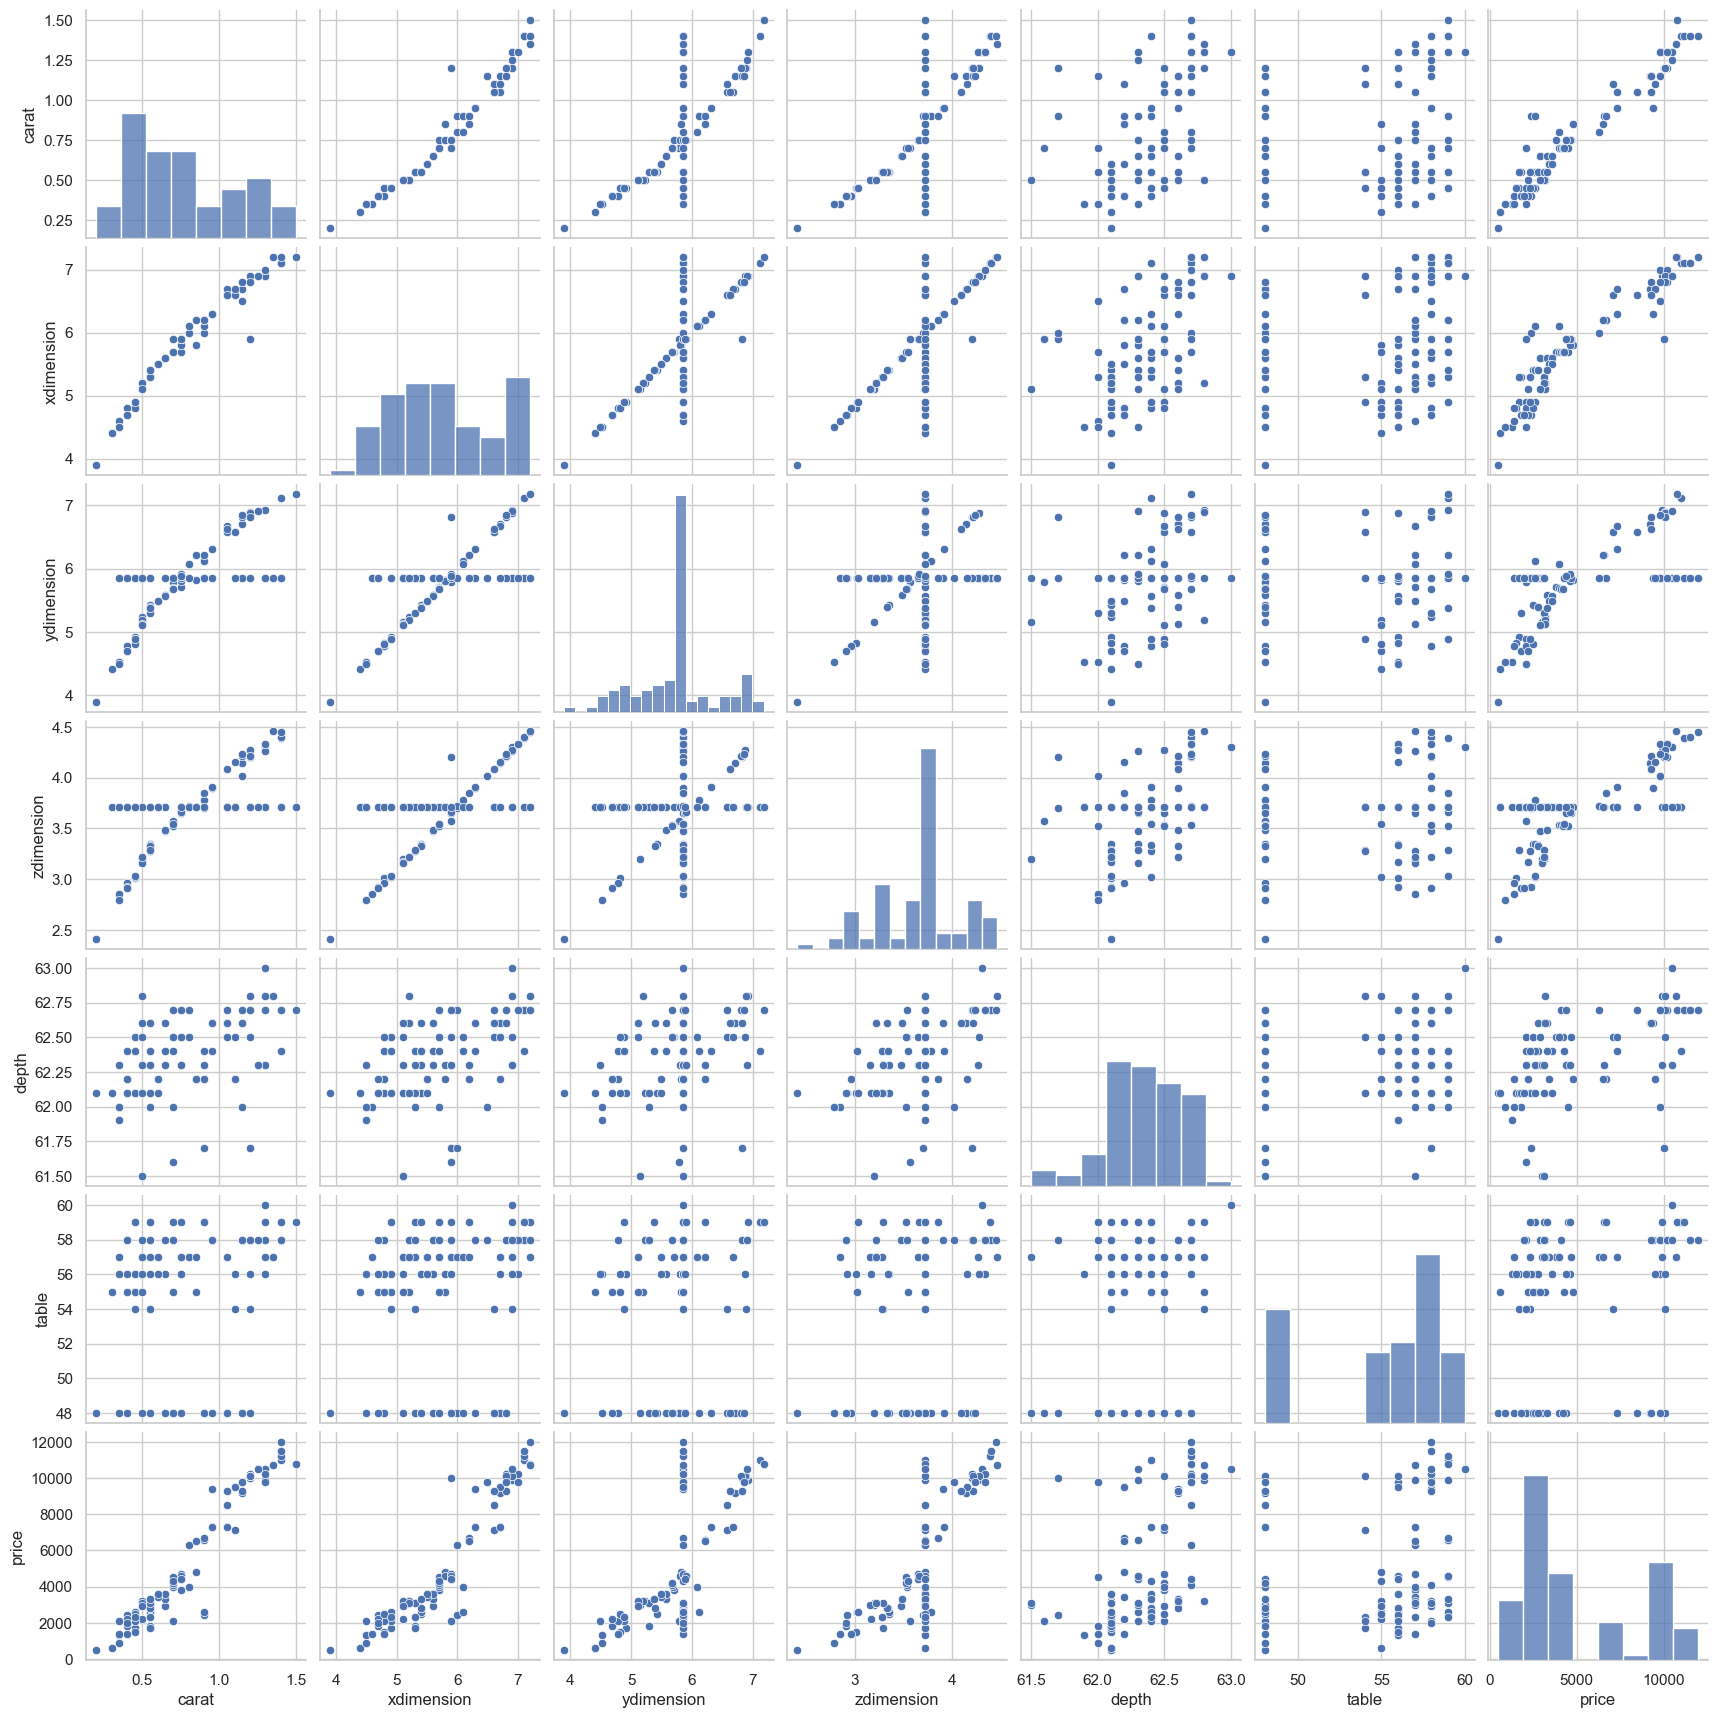

In [822]:
import seaborn as sns

# Usunięcie wartości odstających za pomocą kwartyli
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = ['carat', 'depth', 'table', 'price']
data_df = remove_outliers(data_df, numerical_cols)

sns.pairplot(data_df)

In [781]:
#### to do wyrzucenia


numeric_columns = ['carat', 'xdimension', 'ydimension', 'zdimension', 'depth', 'table', 'price']


df_copy = data_df.copy()

for column in numeric_columns:
    # Obliczamy średnią i odchylenie standardowe
    mean_value = df_copy[column].mean()
    std_dev = df_copy[column].std()
    
    # Ustalamy próg na 3-krotne odchylenie standardowe od średniej
    threshold = 3 * std_dev
    
    outliers = df_copy[(df_copy[column] < mean_value - threshold) | (df_copy[column] > mean_value + threshold)]
    
    print(f"Wartości odstające w kolumnie '{column}':")
    print(outliers)
    print("\n")

Wartości odstające w kolumnie 'carat':
Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price, fitted]
Index: []


Wartości odstające w kolumnie 'xdimension':
Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price, fitted]
Index: []


Wartości odstające w kolumnie 'ydimension':
Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price, fitted]
Index: []


Wartości odstające w kolumnie 'zdimension':
    carat clarity color        cut  xdimension  ydimension  zdimension  depth  \
25    0.2     SI1     H  VERY GOOD         3.9        3.89        2.41   62.1   

    table  price      fitted  
25   57.0  500.0 -132.310419  


Wartości odstające w kolumnie 'depth':
Empty DataFrame
Columns: [carat, clarity, color, cut, xdimension, ydimension, zdimension, depth, table, price, fitted]
Index: []


Wartości odstające w kolumnie 'table':


In [421]:

# # Obliczamy medianę
# median_value = data_df[' depth'].median()

# # Obliczamy średnią i odchylenie standardowe
# mean_value = data_df[' depth'].mean()
# std_dev = data_df[' depth'].std()

# # Ustalamy próg na 3-krotne odchylenie standardowe od średniej
# threshold = 3 * std_dev

# # Zastępujemy wartości odstające medianą
# data_df[' depth'] = np.where((data_df[' depth'] < mean_value - threshold) | (data_df[' depth'] > mean_value + threshold), median_value, data_df[' depth'])



In [824]:
#zapis danych wyczyszczonych, potrzebnych do dashboardu
data_df.to_csv('czyste_dane.csv', index=False)

WIZUALIZACJA:

In [827]:
import plotly.express as px
import plotly.graph_objects as go

numeric_columns = data_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    fig = px.histogram(data_df, x=column, title=f'Histogram - {column}', color_discrete_sequence=['skyblue'], opacity=0.7)

    average_column = data_df[column].mean()
    fig.add_shape(
        go.layout.Shape(
            type='line',
            x0=average_column,
            x1=average_column,
            y0=0,
            y1=1,
            line=dict(color='red', width=2)
        )
    )

    fig.update_layout(
        xaxis_title=f'Wartość {column}',
        yaxis_title="Liczba obserwacji",
    )
    fig.update_traces(marker=dict(line=dict(color='black', width=1)))

    fig.show()


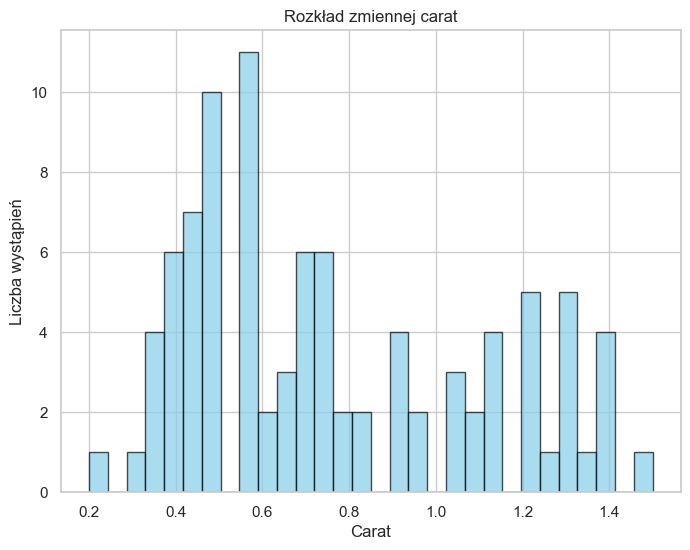

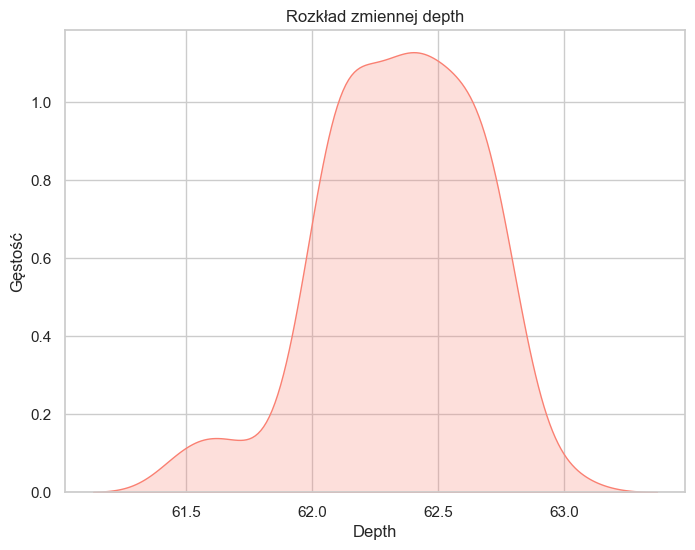

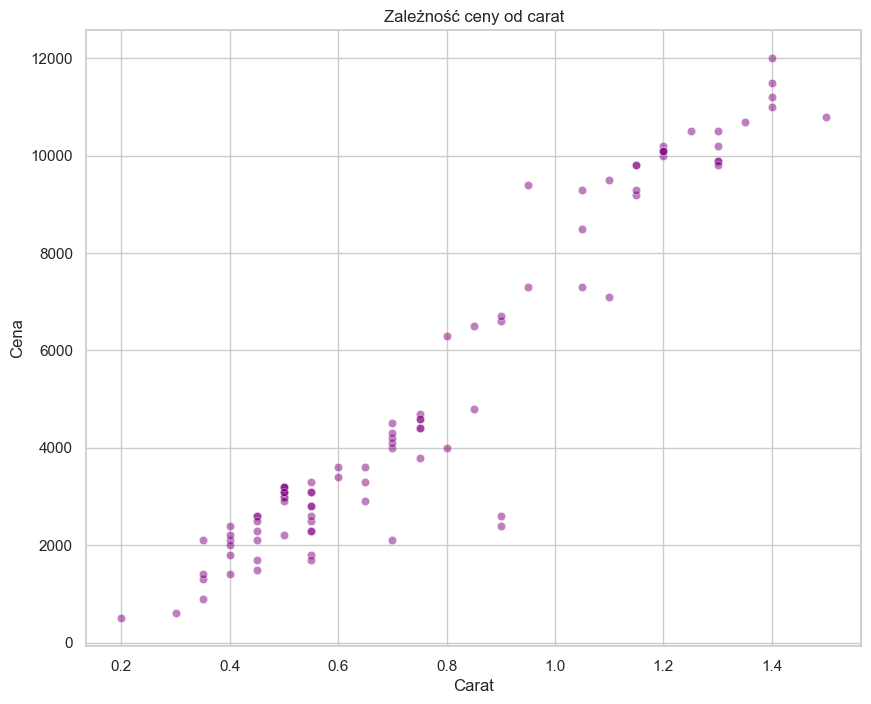

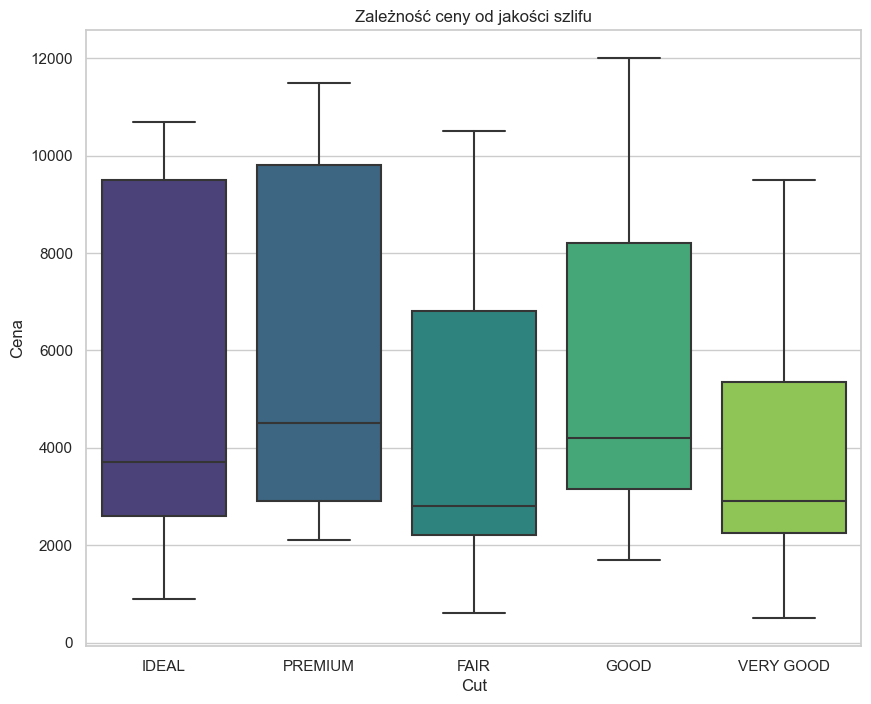

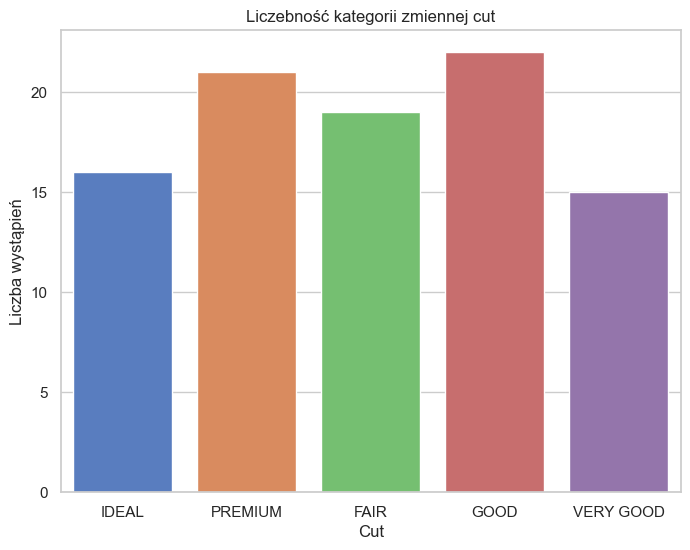

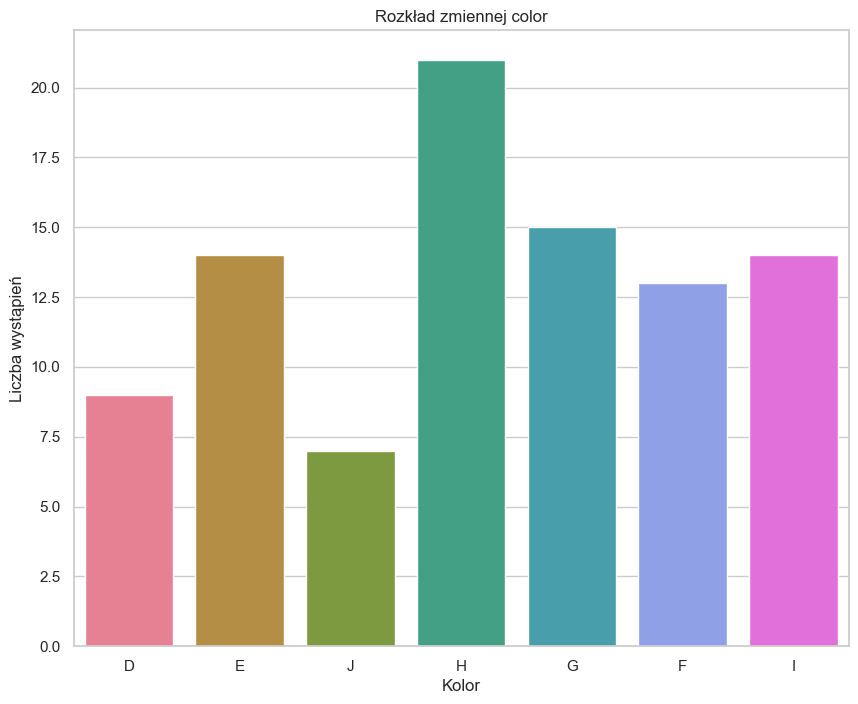

In [829]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(8, 6))
data_df['carat'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Rozkład zmiennej carat')
plt.xlabel('Carat')
plt.ylabel('Liczba wystąpień')
plt.show()

# Wykres gęstości
plt.figure(figsize=(8, 6))
sns.kdeplot(data_df['depth'], fill=True, color='salmon')
plt.title('Rozkład zmiennej depth')
plt.xlabel('Depth')
plt.ylabel('Gęstość')
plt.show()

# Wykres punktowy dla ceny i carat
plt.figure(figsize=(10, 8))
sns.scatterplot(x='carat', y='price', data=data_df, color='purple', alpha=0.5)
plt.title('Zależność ceny od carat')
plt.xlabel('Carat')
plt.ylabel('Cena')
plt.show()

# Wykres pudełkowy dla ceny i cut
plt.figure(figsize=(10, 8))
sns.boxplot(x='cut', y='price', data=data_df, palette='viridis')
plt.title('Zależność ceny od jakości szlifu')
plt.xlabel('Cut')
plt.ylabel('Cena')
plt.show()

# Liczebność dla zmiennej 'cut'
plt.figure(figsize=(8, 6))
sns.countplot(x='cut', data=data_df, palette='muted')
plt.title('Liczebność kategorii zmiennej cut')
plt.xlabel('Cut')
plt.ylabel('Liczba wystąpień')
plt.show()

# Rozkładu zmiennej 'color'
plt.figure(figsize=(10, 8))
sns.countplot(x='color', data=data_df, palette='husl')
plt.title('Rozkład zmiennej color')
plt.xlabel('Kolor')
plt.ylabel('Liczba wystąpień')
plt.show()


mapa korelacji

In [830]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


data_df_encoded = data_df.copy()

# Encodujemy kategoryczne wartości
le = LabelEncoder()
data_df_encoded['clarity'] = le.fit_transform(data_df_encoded['clarity'])
data_df_encoded['color'] = le.fit_transform(data_df_encoded['color'])
data_df_encoded['cut'] = le.fit_transform(data_df_encoded['cut'])

corr_matrix = data_df_encoded.corr()

fig = px.imshow(corr_matrix, color_continuous_scale='Agsunset', title="Mapa korelacji")

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        fig.add_annotation(
            x=i, y=j,
            text=f"{corr_matrix.iloc[i, j]:.2f}",
            showarrow=False,
            font=dict(size=10)
        )

fig.show()


In [833]:
import plotly.express as px

fig2 = px.scatter_3d(data_df, x='xdimension', y='ydimension', z='zdimension', color='price', title='Zależność ceny od wymiarów')

fig2.show()


In [834]:
import plotly.express as px

# Wizualizacja zależności ceny od koloru
fig_color = px.box(data_df, x='color', y='price', title='Zależność ceny od koloru')

# Wizualizacja zależności ceny od klarowności
fig_clarity = px.box(data_df, x='clarity', y='price', title='Zależność ceny od klarowności')

fig_color.show()
fig_clarity.show()


In [836]:
import plotly.express as px

# Wizualizacja zależności ceny od masy diamentu
fig = px.scatter(data_df, x='carat', y='price', title='Zależność ceny od masy diamentu', trendline="ols")
fig.show()

In [837]:
import statsmodels.formula.api as smf

formula = "price ~ C(color)"

model = smf.ols(formula=formula, data=data_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.600
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.157
Time:                        15:02:51   Log-Likelihood:                -882.16
No. Observations:                  93   AIC:                             1778.
Df Residuals:                      86   BIC:                             1796.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6022.2222   1104.556      5.452

In [840]:
import numpy as np

model_mean = smf.ols("price ~ 1", data=data_df).fit()
resid_mean, resid_model = np.mean(model_mean.resid**2), np.mean(model.resid**2)
(resid_mean - resid_model)/resid_mean

0.10042694572597943

In [841]:
resid_mean, resid_model = model_mean.mse_resid, model.mse_resid
(resid_mean - resid_model)/resid_mean # QED

0.037666034962676044

In [842]:

formula_multi = "price ~ carat + xdimension + zdimension"

model_multi = smf.ols(formula=formula_multi, data=data_df).fit()

print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     380.7
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.25e-50
Time:                        15:15:29   Log-Likelihood:                -764.93
No. Observations:                  93   AIC:                             1538.
Df Residuals:                      89   BIC:                             1548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1010.6730   2298.595     -0.440      0.6

In [845]:
model_mean = smf.ols("price ~ 1", data=data_df).fit()
resid_mean = np.mean(model_mean.resid**2)
resid_model = np.mean(model_multi.resid**2)
result = (resid_mean - resid_model) / resid_mean
result

0.9276992448192565

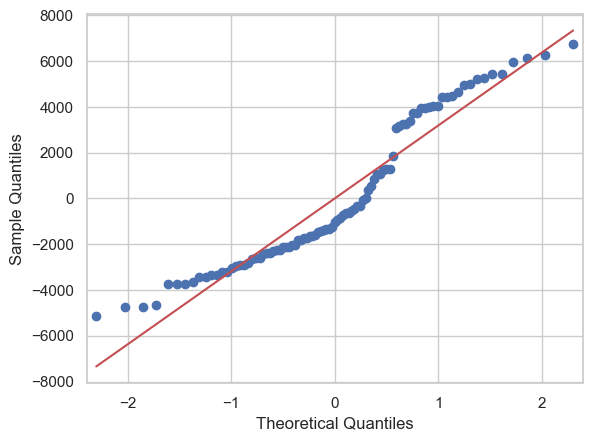

In [846]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = model.resid
sm.qqplot(residuals, line='s')
plt.show()



wizualizacja modelu regresji dla price ~ carat

In [849]:
import plotly.graph_objects as go
formula = "price ~ carat"

model_carat = smf.ols(formula=formula, data=data_df).fit()

data_df["fitted"] = model_carat.fittedvalues

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_df["carat"], y=data_df["price"], name="Carat vs Price", mode="markers"))

fig.add_trace(go.Scatter(
    x=data_df["carat"], y=data_df["fitted"], name="Model regresji"))

fig.update_layout(title="Regression: Carat vs Price",
                  xaxis_title="Carat",
                  yaxis_title="Price")
fig.show()


wykres zalezności reszt od wartości z modelu regresji
wynika z niego, ze reszty są losowe, czyli dobrze

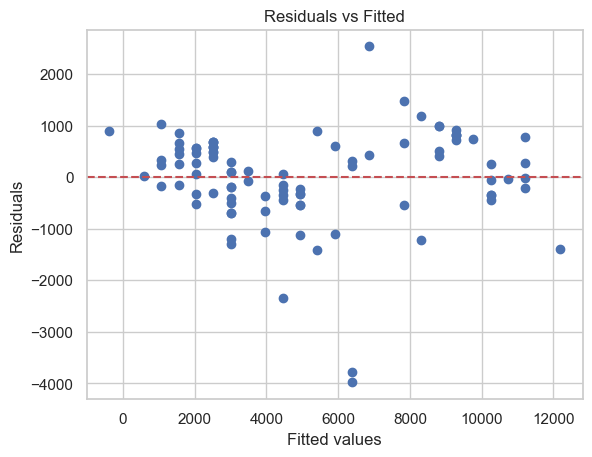

In [850]:
import matplotlib.pyplot as plt
plt.scatter(model_carat.fittedvalues, model_carat.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


wykres kwantylowy dla reszt modelu regresji
wynika z niego, ze reszty sa w miare zblizone do rozkladu normalnego, czyli dobrze

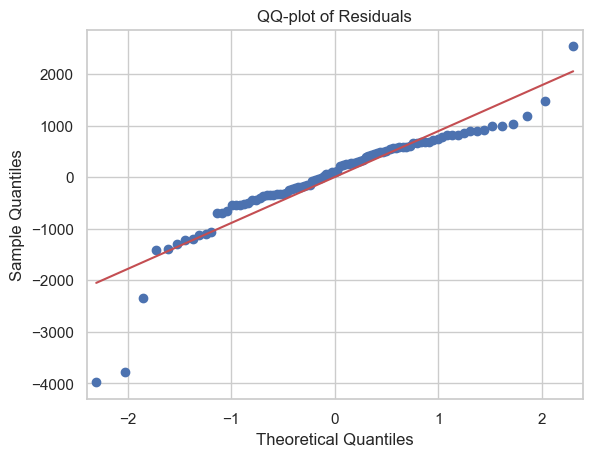

In [851]:
import statsmodels.api as sm
sm.qqplot(model_carat.resid, line='r')
plt.title('QQ-plot of Residuals')
plt.show()


In [852]:
print("Model P Values:", model_carat.pvalues.values)
print("Model Coef:", model_carat.params.values)
print("Model Std Errs:", model_carat.bse.values)

Model P Values: [1.95472128e-15 7.76515708e-53]
Model Coef: [-2320.68225858  9670.7356248 ]
Model Std Errs: [242.31203371 289.75183205]


p value jest bardzo bliska 0 co sugeruje, ze zmienna 'carat' jest istotna dla modelu
model sugeruje, że istnieje statystycznie istotna zależność między zmienną carat a ceną diamentu

PRÓBA WYKONANANIA MODELU REGRESJI METODĄ ELIMINACJI WSTECZNEJ:

In [853]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula_all = "price ~ carat + C(clarity) + C(color) + C(cut) + xdimension + ydimension + zdimension + depth + table"

model_all = smf.ols(formula=formula_all, data=data_df).fit()

print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     74.45
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           5.02e-40
Time:                        15:33:57   Log-Likelihood:                -741.25
No. Observations:                  93   AIC:                             1526.
Df Residuals:                      71   BIC:                             1582.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.786e+04   2

In [860]:
# Statystyki testów (t-test) dla każdej zmiennej w modelu
t_test_stats = model_all.t_test(np.eye(len(model_all.params)))

# Wyświetlenie wyników
print("P-values for each variable:")
print(t_test_stats.pvalue)

# Porównanie wartości p-value z poziomem istotności 0.05
alpha = 0.05
# Przeprowadzenie testu dla każdej kolumny
for i, col_name in enumerate(model_all.model.exog_names):
    p_value = model_all.pvalues[i]
    if p_value > alpha:
        print(f"Variable {col_name} has p-value {p_value} greater than 0.05 and can be considered for removal.")



P-values for each variable:
[5.63587134e-02 6.09480796e-03 5.01904481e-02 1.65527113e-01
 6.52045759e-03 1.30063328e-03 4.94535252e-01 7.25728619e-01
 8.38218155e-01 4.51260715e-01 4.72091611e-01 2.34433271e-01
 5.48334678e-01 2.23632082e-01 5.01707099e-02 2.95695853e-01
 2.36416088e-11 4.47522359e-01 8.15031701e-01 6.23026696e-01
 6.97049844e-02 8.25691084e-01]
Variable Intercept has p-value 0.056358713426559244 greater than 0.05 and can be considered for removal.
Variable C(clarity)[T.SI1] has p-value 0.050190448139108466 greater than 0.05 and can be considered for removal.
Variable C(clarity)[T.SI2] has p-value 0.16552711264001066 greater than 0.05 and can be considered for removal.
Variable C(color)[T.E] has p-value 0.49453525245615804 greater than 0.05 and can be considered for removal.
Variable C(color)[T.F] has p-value 0.7257286187741758 greater than 0.05 and can be considered for removal.
Variable C(color)[T.G] has p-value 0.8382181552148616 greater than 0.05 and can be conside

In [871]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula_second_iteration = "price ~ carat + C(clarity) + C(cut)"

model_second_iteration = smf.ols(formula=formula_second_iteration, data=data_df).fit()

print(model_second_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.59e-49
Time:                        15:50:28   Log-Likelihood:                -746.91
No. Observations:                  93   AIC:                             1516.
Df Residuals:                      82   BIC:                             1544.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3531.4276    

In [872]:
# Test statystyczny (t-test) dla każdej zmiennej w modelu drugiej iteracji
t_test_stats_second_iteration = model_second_iteration.t_test(np.eye(len(model_second_iteration.params)))

alpha = 0.05

print("\nVariables with p-value > 0.05 in the second iteration:")
for i, col_name in enumerate(model_second_iteration.model.exog_names):
    p_value = t_test_stats_second_iteration.pvalue[i]
    if p_value > alpha:
        print(f"Variable {col_name} has p-value {p_value} greater than 0.05 and can be considered for removal.")




Variables with p-value < 0.05 in the second iteration:
Variable C(cut)[T.GOOD] has p-value 0.7478880005058273 greater than 0.05 and can be considered for removal.
Variable C(cut)[T.IDEAL] has p-value 0.11449372222301339 greater than 0.05 and can be considered for removal.
Variable C(cut)[T.VERY GOOD] has p-value 0.24504643715438304 greater than 0.05 and can be considered for removal.


In [873]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula_third_iteration = "price ~ carat + C(clarity)"

model_third_iteration = smf.ols(formula=formula_third_iteration, data=data_df).fit()

print(model_third_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.35e-51
Time:                        15:51:21   Log-Likelihood:                -754.07
No. Observations:                  93   AIC:                             1522.
Df Residuals:                      86   BIC:                             1540.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3212.2768    320

In [879]:
# Porównanie wartości p-value z poziomem istotności 0.05 w trzeciej iteracji
alpha = 0.05
non_significant_vars_third_iteration = t_test_stats_third_iteration.pvalue > alpha


# Wyświetlenie nazw zmiennych nieistotnych
non_significant_var_names_third_iteration = np.array(model_third_iteration.model.exog_names)[non_significant_vars_third_iteration]

print("\nVariable names with p-value > 0.05 in the third iteration:")
print(non_significant_var_names_third_iteration)




Variable names with p-value > 0.05 in the third iteration:
['C(clarity)[T.SI2]']


In [877]:
print("Model P Values:", model_third_iteration.pvalues.values)
print("Model Coef:", model_third_iteration.params.values)
print("Model Std Errs:", model_third_iteration.bse.values)

Model P Values: [4.10020778e-16 1.25120545e-04 1.27368708e-03 1.10566845e-01
 4.54987295e-04 3.02164974e-04 3.53400757e-54]
Model Coef: [-3212.27677267  1510.38359866  1067.93981346   501.89587273
  1179.38510606  1223.30420999  9652.73266659]
Model Std Errs: [320.50655675 375.8620445  320.53749845 311.29734446 323.45123189
 324.77136542 264.03331821]


P-value dla większości zmiennych jest znacznie mniejsze niż 0.05, co sugeruje, że te zmienne są istotne statystycznie.
Wydaje się więc, ze wszytskie zmienne w modelu aktualnie sa istotne

/Users/aleksandra/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x600 with 0 Axes>

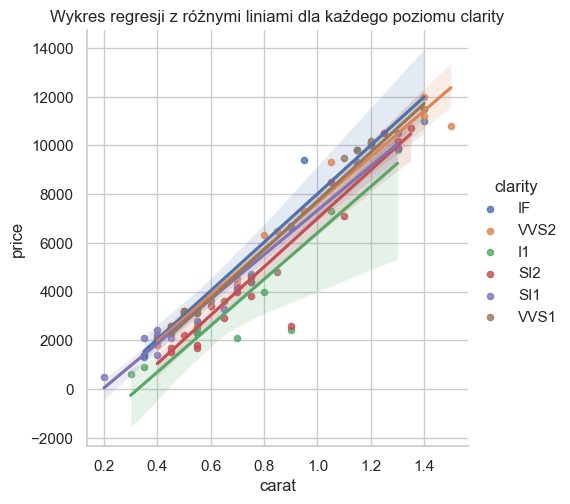

In [883]:
import seaborn as sns
import matplotlib.pyplot as plt

# Przygotowanie danych do wykresu
data_for_plot = data_df.copy()
data_for_plot['predicted_price'] = model_third_iteration.fittedvalues  # Dodanie przewidywanych wartości do danych

# Wykres regresji z różnymi liniami dla każdego poziomu clarity
plt.figure(figsize=(12, 6))
sns.lmplot(x='carat', y='price', hue='clarity', data=data_for_plot, scatter_kws={'s': 20})
plt.title('Wykres regresji z różnymi liniami dla każdego poziomu clarity')
plt.show()

